#Bite into Data: Unveiling Food Preferences in Uttar Pradesh

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")


#[1] Project Definition and Data Understanding :-


**#1.1	Business Problem Statement**

In [ ]:
print("1. Project Definition and Data Understanding\n")


1. Project Definition and Data Understanding



**#1.2	Key Questions**

**#1.3	Data Sources**

In [ ]:
df = pd.read_csv("/content/_Cuisines of Uttar Pradesh - Awareness Survey_  (Responses) - (Actual Data).csv")

In [ ]:
csv_path = "/mnt/data/_Cuisines of Uttar Pradesh - Awareness Survey_  (Responses) - (Actual Data).csv"

In [ ]:
# Display basic info
print(df.info())
print("\nSample Data:\n", df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 13 columns):
 #   Column                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                 --------------  ----- 
 0   Timestamp                                                                                              121 non-null    object
 1   Full Name                                                                                              121 non-null    object
 2     Age Group                                                                                            121 non-null    object
 3   State of Residence                                                                                     121 non-null    object
 4   Have you ever visited Uttar Pradesh?                                                                   1

**#1.4	Data Dictionary**

In [ ]:
# Data dictionary creation
data_dict = pd.DataFrame({
 "Column Name": df.columns,
 "Data Type": df.dtypes,
 "Missing Values": df.isnull().sum(),
 "Unique Values": df.nunique()
})
print("\nData Dictionary:\n", data_dict)


Data Dictionary:
                                                                                           Column Name  \
Timestamp                                                                                   Timestamp   
Full Name                                                                                   Full Name   
  Age Group                                                                               Age Group     
State of Residence                                                                 State of Residence   
Have you ever visited Uttar Pradesh?                             Have you ever visited Uttar Pradesh?   
What is your dietary preference?                                    What is your dietary preference?    
Which of the following Uttar Pradesh's dishes d...  Which of the following Uttar Pradesh's dishes ...   
Which of the following Uttar Pradesh's dishes d...  Which of the following Uttar Pradesh's dishes ...   
Would you like to visit Uttar Prades

#[2]	Data Collection and Integration :-

**#2.1	Data Source and Collection**

In [ ]:
print("\n2. Data Collection and Integration\n")


2. Data Collection and Integration



**#2.2	Data Provenance**

**#2.3	Integration Methodology**


In [ ]:
# Already collected from Google Form (CSV)
print("Data source: Google Form CSV export")
print("Number of rows and columns:", df.shape)

Data source: Google Form CSV export
Number of rows and columns: (121, 13)


**#2.4	Initial Validation**

#[3]	Data Cleaning and Preparation :-

**#3.1	Check Shape, Data Types, and Null Values**

In [ ]:
# Dataset shape
print("Dataset shape:",df.shape)
# Data types and  nulls
print("\nData types and missing values :")
print(df.info())
# Summary o f  n u l l  value s
print("\n Missing values in each column:")
print(df.isnull().sum())


Dataset shape: (121, 13)

Data types and missing values :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 13 columns):
 #   Column                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                 --------------  ----- 
 0   Timestamp                                                                                              121 non-null    object
 1   Full Name                                                                                              121 non-null    object
 2     Age Group                                                                                            121 non-null    object
 3   State of Residence                                                                                     121 non-null    object
 4   Have you ever visited Uttar Pradesh?          

**#3.2 Outlier Treatment**

In [ ]:
# Handle outliers: Cap using z-score
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
 z_scores = np.abs(stats.zscore(df[col]))
 df = df[(z_scores < 3)]



Initial DataFrame Description:
       Would you like to visit Uttar Pradesh in future? (rate:1-5)
count                                         121.000000          
mean                                            3.685950          
std                                             1.245211          
min                                             1.000000          
25%                                             3.000000          
50%                                             4.000000          
75%                                             5.000000          
max                                             5.000000          


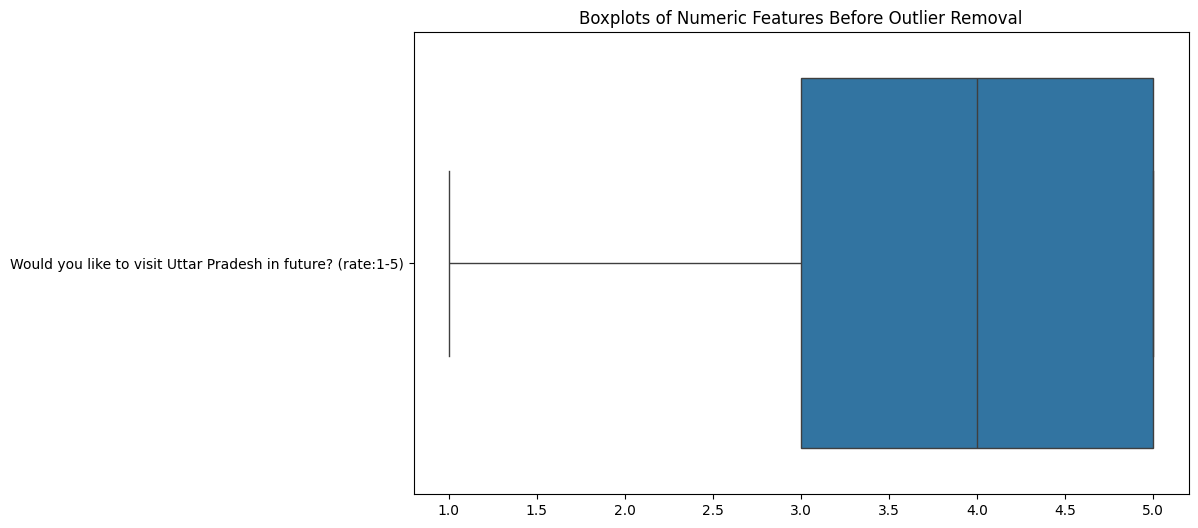


DataFrame Info After Outlier Removal:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 13 columns):
 #   Column                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                 --------------  ----- 
 0   Timestamp                                                                                              121 non-null    object
 1   Full Name                                                                                              121 non-null    object
 2     Age Group                                                                                            121 non-null    object
 3   State of Residence                                                                                     121 non-null    object
 4   Have you ever visited Uttar Pradesh?                             

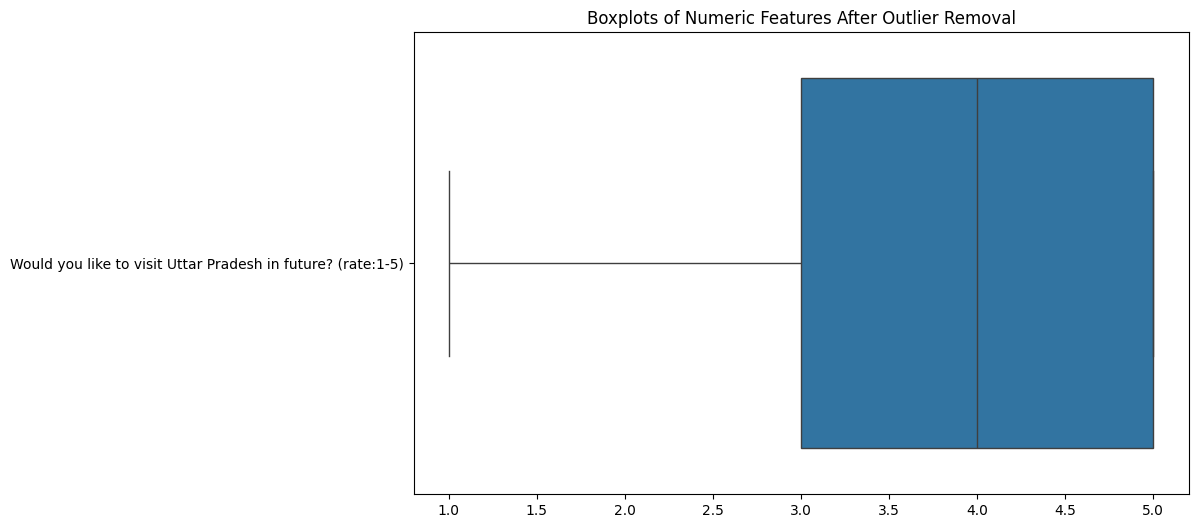

In [ ]:
#Address Outliers:-
# Describe the DataFrame
print("\nInitial DataFrame Description:")
print(df.describe())

#Show boxplots for numeric columns *before* outlier removal
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
if not numeric_df.empty:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=numeric_df, orient='h')
    plt.title("Boxplots of Numeric Features Before Outlier Removal")
    plt.show()
else:
    print("No numeric columns to show boxplots before outlier removal.")

#Remove outliers using the IQR method for all numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns  # Get numeric column names
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

#Display info about the DataFrame *after* outlier removal
print("\nDataFrame Info After Outlier Removal:")
df.info()

#Describe the DataFrame *after* outlier removal
print("\nDataFrame Description After Outlier Removal:")
print(df.describe())

#Show boxplots for numeric columns *after* outlier removal
numeric_df = df.select_dtypes(include=['number'])  # Re-select numeric columns after fialtering
if not numeric_df.empty:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=numeric_df, orient='h')
    plt.title("Boxplots of Numeric Features After Outlier Removal")
    plt.show()
else:
    print("No numeric columns to show boxplots after outlier removal.")


**#3.3	Data Type Corrections**

In [ ]:
# Convert data types if needed
df = df.convert_dtypes()


In [ ]:
# Convert the 'Timestamp' column to datetime, handling errors
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Display the data types of the DataFrame to verify the conversion
print(df.dtypes)


Timestamp                                                                                                datetime64[ns]
Full Name                                                                                                string[python]
  Age Group                                                                                              string[python]
State of Residence                                                                                       string[python]
Have you ever visited Uttar Pradesh?                                                                     string[python]
What is your dietary preference?                                                                         string[python]
Which of the following Uttar Pradesh's dishes do you know about or have you tried? (Vegetarian)          string[python]
Which of the following Uttar Pradesh's dishes do you know about or have you tried?  (Non-Vegetarian)     string[python]
Would you like to visit Uttar Pradesh in

**#3.4	Normalize Numerical Features**

In [ ]:
# Normalize numeric data
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print("Cleaned Data:\n", df.head())


Cleaned Data:
             Timestamp          Full Name   Age Group   State of Residence  \
0 2025-02-05 20:56:40    Arushi Shivhare         18-25       Maharashtra    
1 2025-02-05 21:07:14         Akash Shah         18-25        Maharashtra   
2 2025-02-05 21:15:29  Alankrita Bhonde          18-25       Maharashtra    
3 2025-02-05 21:35:35   Tanushree Joshi          18-25       Maharashtra    
4 2025-02-05 21:36:06    Gautam Sukhani          18-25        Maharashtra   

  Have you ever visited Uttar Pradesh? What is your dietary preference?   \
0                                  Yes                    Non-Vegetarian   
1                                   No                       Vegetarian    
2                                   No                   Non-Vegetarian    
3                                   No                   Non-Vegetarian    
4                                   No                       Vegetarian    

  Which of the following Uttar Pradesh's dishes do you know about

**#3.5	Encode Categorical Variables**

In [ ]:
# Encoding categorical columns
label_encoders = {}
cat_cols = df.select_dtypes(include='string').columns
for col in cat_cols:
 le = LabelEncoder()
 df[col] = le.fit_transform(df[col].astype(str))
 label_encoders[col] = le


**#3.6	Create Derived Features**

#[4]	Exploratory Data Analysis :-

**#4.1	Descriptive Statistics**

In [ ]:
print("\n4. Exploratory Data Analysis\n")
print("Descriptive Statistics:\n", df.describe())


4. Exploratory Data Analysis

Descriptive Statistics:
                            Timestamp   Full Name    Age Group    \
count                            121  121.000000     121.000000   
mean   2025-03-06 04:42:42.198347264   59.074380       0.173554   
min              2025-02-05 20:56:40    0.000000       0.000000   
25%              2025-02-05 23:45:16   29.000000       0.000000   
50%              2025-03-24 11:11:43   59.000000       0.000000   
75%              2025-03-25 15:56:44   89.000000       0.000000   
max              2025-03-25 16:02:05  119.000000       3.000000   
std                              NaN   34.954772       0.641323   

       State of Residence  Have you ever visited Uttar Pradesh?  \
count          121.000000                            121.000000   
mean             8.628099                              0.479339   
min              0.000000                              0.000000   
25%              7.000000                              0.000000   
50%  

**#4.2	Visualization**

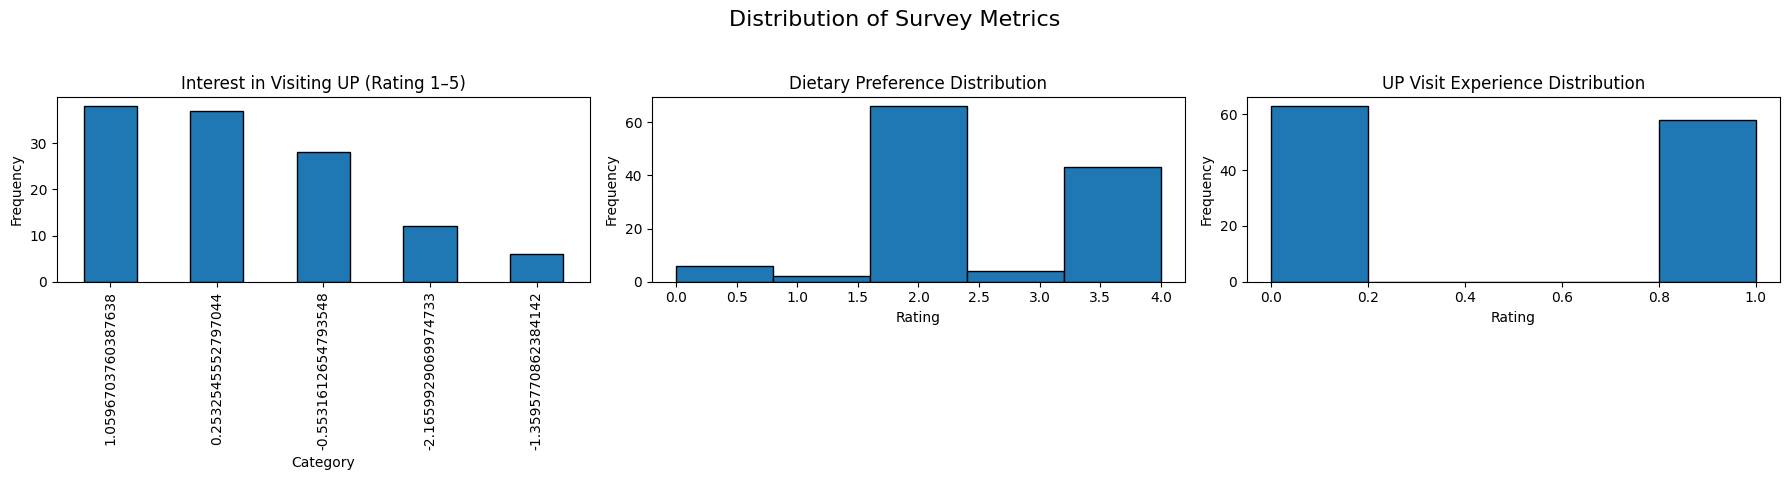

In [ ]:
# 4.1.1 Distribution - HISTOGRAMS
# Columns to plot
features = [
    'Would you like to visit Uttar Pradesh in future? (rate:1-5)',
    'What is your dietary preference? ',
    'Have you ever visited Uttar Pradesh?'
]

titles = [
    'Interest in Visiting UP (Rating 1–5)',
    'Dietary Preference Distribution',
    'UP Visit Experience Distribution'
]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot each feature
for i, feature in enumerate(features):
    if df[feature].dtype == 'int64':
        axes[i].hist(df[feature], bins=5, edgecolor='black')
        axes[i].set_xlabel('Rating')
    else:
        df[feature].value_counts().plot(kind='bar', ax=axes[i], edgecolor='black')
        axes[i].set_xlabel('Category')

    axes[i].set_title(titles[i])
    axes[i].set_ylabel('Frequency')

# Add main title
fig.suptitle('Distribution of Survey Metrics', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

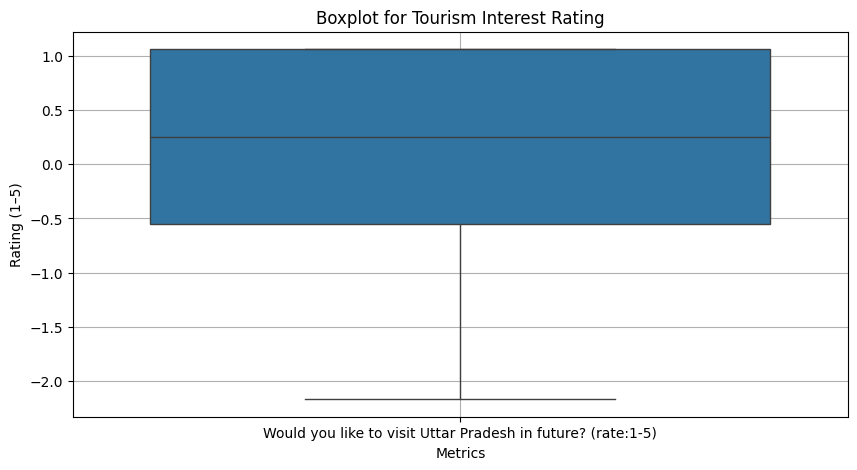

In [ ]:
# 4.1.2 BOXPLOTS
# Set plot size
plt.figure(figsize=(10, 5))

# Boxplot of relevant metric
sns.boxplot(data=df[[
    'Would you like to visit Uttar Pradesh in future? (rate:1-5)'
]])

# Add titles and labels
plt.title('Boxplot for Tourism Interest Rating')
plt.xlabel('Metrics')
plt.ylabel('Rating (1–5)')
plt.grid(True)

# Show plot
plt.show()

**#4.3 Correlation Analysis**

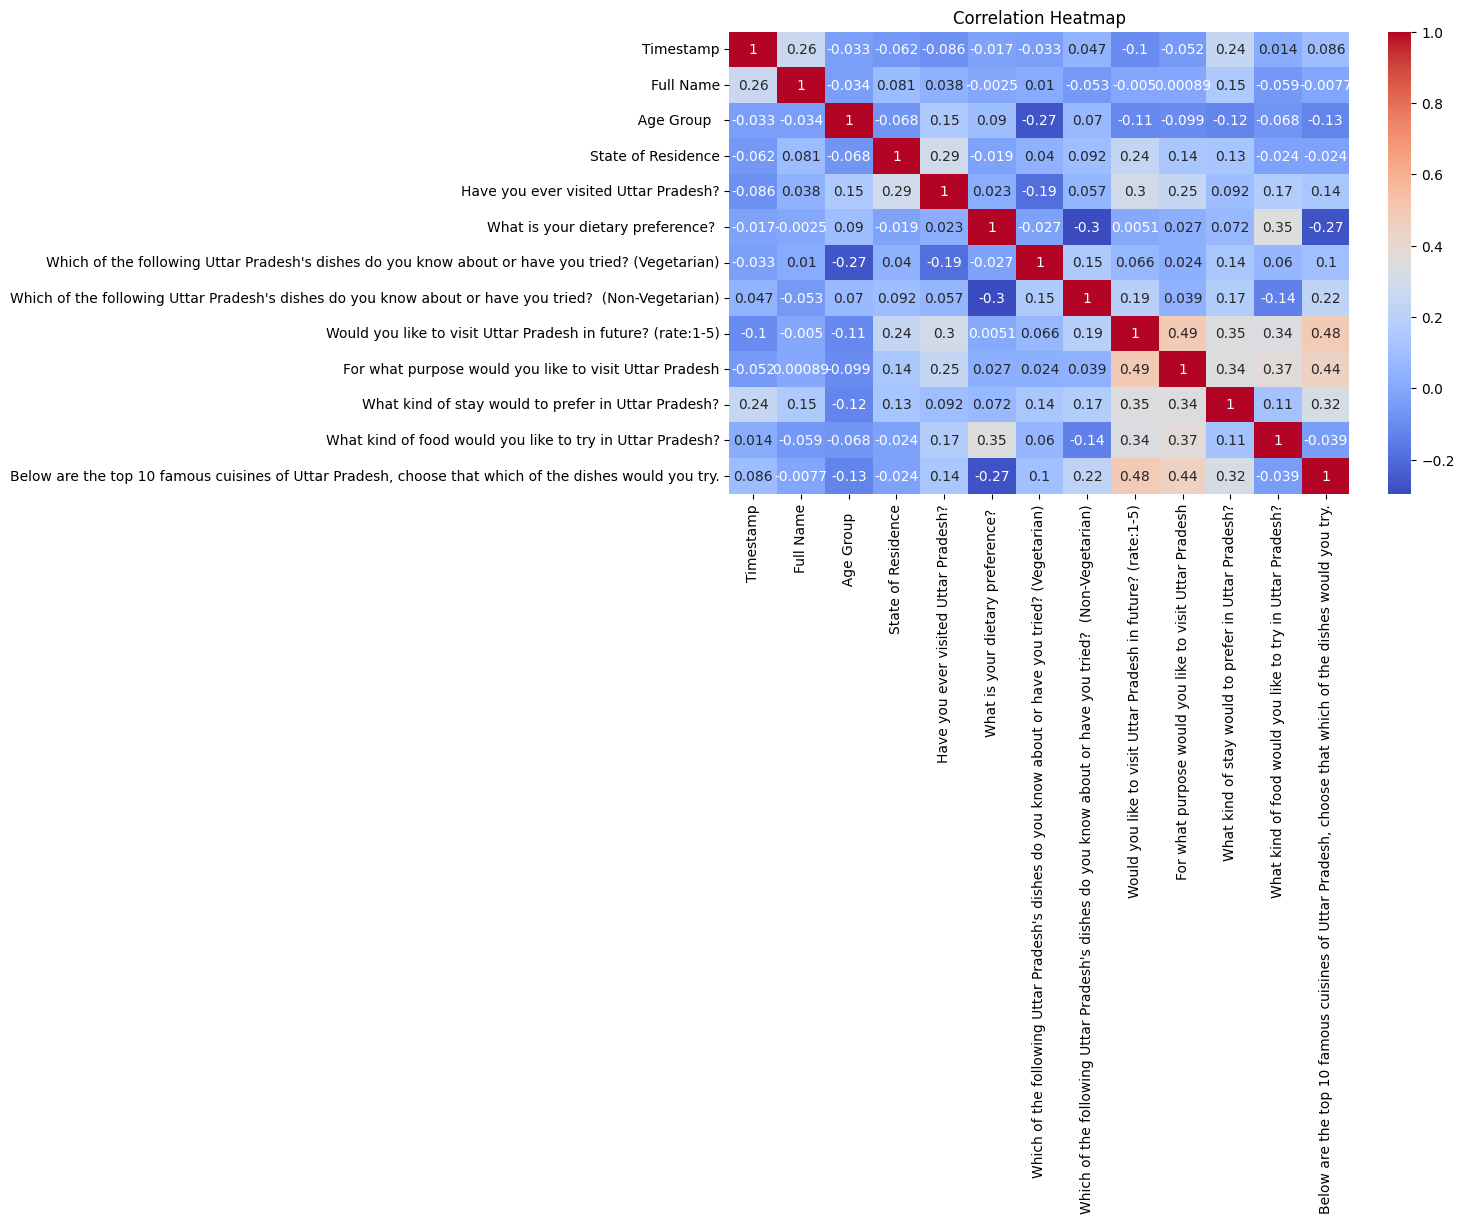

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**#4.4 Test for Statistical Properties**

Normality Test: Would you like to visit Uttar Pradesh in future? (rate:1-5)
Shapiro-Wilk p-value: 0.0000
Not normal (reject H0)


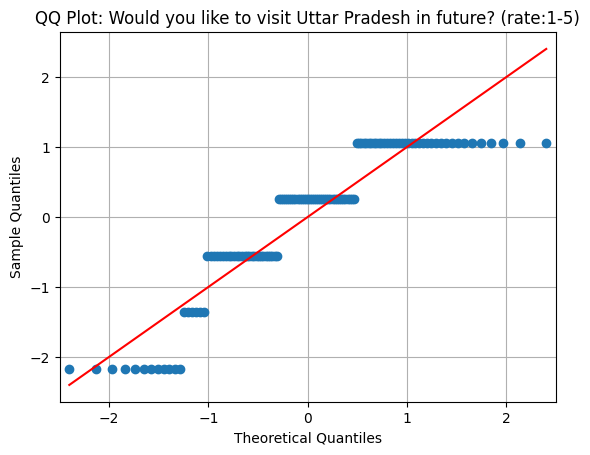

In [ ]:
#4.4.1 Normality Tests
from scipy.stats import shapiro
import statsmodels.api as sm

# Choose the numeric column to test
col = 'Would you like to visit Uttar Pradesh in future? (rate:1-5)'

print(f"Normality Test: {col}")

# Shapiro-Wilk Test
stat, p = shapiro(df[col])
print(f"Shapiro-Wilk p-value: {p:.4f}")

if p > 0.05:
    print("Likely normal (fail to reject H0)")
else:
    print("Not normal (reject H0)")

# QQ Plot
sm.qqplot(df[col], line='s')
plt.title(f"QQ Plot: {col}")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid(True)
plt.show()


In [ ]:
#4.4.2 Other Statistical Properties: Skewness and Kurtosis

# Print header
print("\nSkewness and Kurtosis:")

# Column to analyze
col = 'Would you like to visit Uttar Pradesh in future? (rate:1-5)'

# Compute skewness and kurtosis
skew = df[col].skew()
kurt = df[col].kurt()

# Print results
print(f"{col}: Skewness = {skew:.4f}, Kurtosis = {kurt:.4f}")



Skewness and Kurtosis:
Would you like to visit Uttar Pradesh in future? (rate:1-5): Skewness = -0.8029, Kurtosis = -0.1873


#[5] Statistical Analysis :-

**#5.1 Hypothesis Testing**

In [ ]:
# Paired sample t-test
from scipy.stats import ttest_rel

# Filter the column
col = 'Would you like to visit Uttar Pradesh in future? (rate:1-5)'

# Split data into two groups
visited = df[df['Have you ever visited Uttar Pradesh?'] == 'Yes'][col]
not_visited = df[df['Have you ever visited Uttar Pradesh?'] == 'No'][col]

# Ensure equal length by dropping unequal pairs (for paired t-test)
min_len = min(len(visited), len(not_visited))
visited = visited.iloc[:min_len]
not_visited = not_visited.iloc[:min_len]

# Perform paired t-test
t_stat, p_val = ttest_rel(visited, not_visited)

# Display result
print("Paired T-Test: Visit Rating (Visited vs Not Visited)")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.4f}")

if p_val < 0.05:
    print("Reject H₀: Significant difference found")
else:
    print("Fail to reject H₀: No significant difference")


Paired T-Test: Visit Rating (Visited vs Not Visited)
t-statistic: nan
p-value: nan
Fail to reject H₀: No significant difference


**#5.2 Regression Analysis**


#[6] Advanced Analytics :-

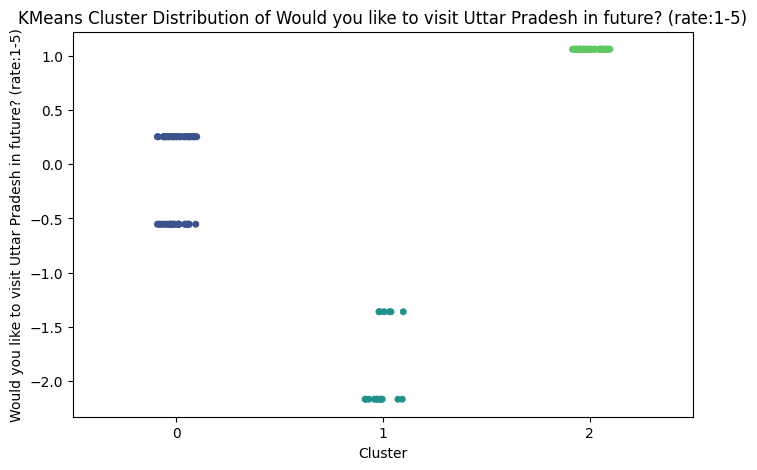

In [ ]:
# KMeans Clustering - Fixing scatter plot
from sklearn.decomposition import PCA
# Ensure we're using only numerical features for clustering
kmeans_data = df[numeric_cols]
# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(kmeans_data)
# Visualization based on the number of numeric features
if len(numeric_cols) >= 2:
 plt.figure(figsize=(8,5))
 sns.scatterplot(data=df, x=numeric_cols[0], y=numeric_cols[1],
hue='Cluster', palette='viridis')
 plt.title("KMeans Clustering Result")
 plt.show()
elif len(numeric_cols) == 1:
 plt.figure(figsize=(8,5))
 sns.stripplot(data=df, x='Cluster', y=numeric_cols[0],
palette='viridis', jitter=True)
 plt.title(f"KMeans Cluster Distribution of {numeric_cols[0]}")
 plt.show()
else:
 print("No numeric columns found to plot clustering.")


[7] Visualizations on Dataset :-

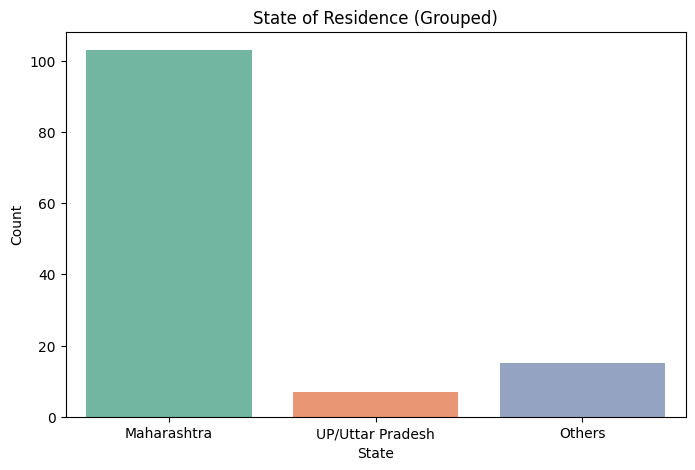

In [ ]:
#7.1 State of Residence (Grouped and Cleaned)
states = {
 'Maharashtra': 103,
 'UP/Uttar Pradesh': 7,
 'Others': 15
}
plt.figure(figsize=(8,5))
sns.barplot(x=list(states.keys()), y=list(states.values()),
palette="Set2")
plt.title("State of Residence (Grouped)")
plt.ylabel("Count")
plt.xlabel("State")
plt.show()

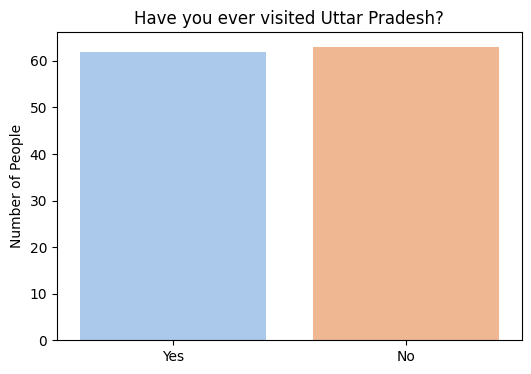

In [ ]:
#7.2 Have You Visited UP?
visited_up = {'Yes': 62, 'No': 63}
plt.figure(figsize=(6,4))
sns.barplot(x=list(visited_up.keys()), y=list(visited_up.values()),
palette="pastel")
plt.title("Have you ever visited Uttar Pradesh?")
plt.ylabel("Number of People")
plt.show()

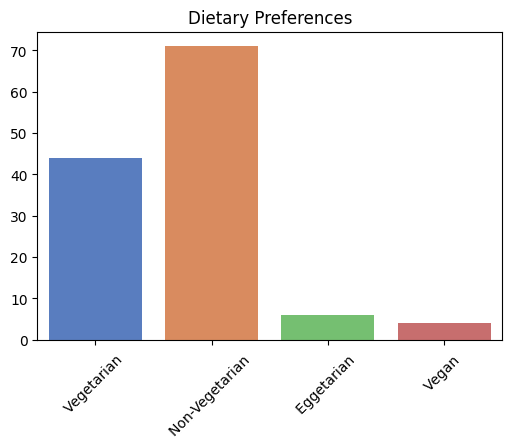

In [ ]:
#7.3 Dietary Preference
diet = {
 'Vegetarian ': 44,
 'Non-Vegetarian ': 71,
 'Eggetarian ': 6,
 'Vegan ': 4
}
plt.figure(figsize=(6,4))
sns.barplot(x=list(diet.keys()), y=list(diet.values()),
palette="muted")
plt.title("Dietary Preferences")
plt.xticks(rotation=45)
plt.show()

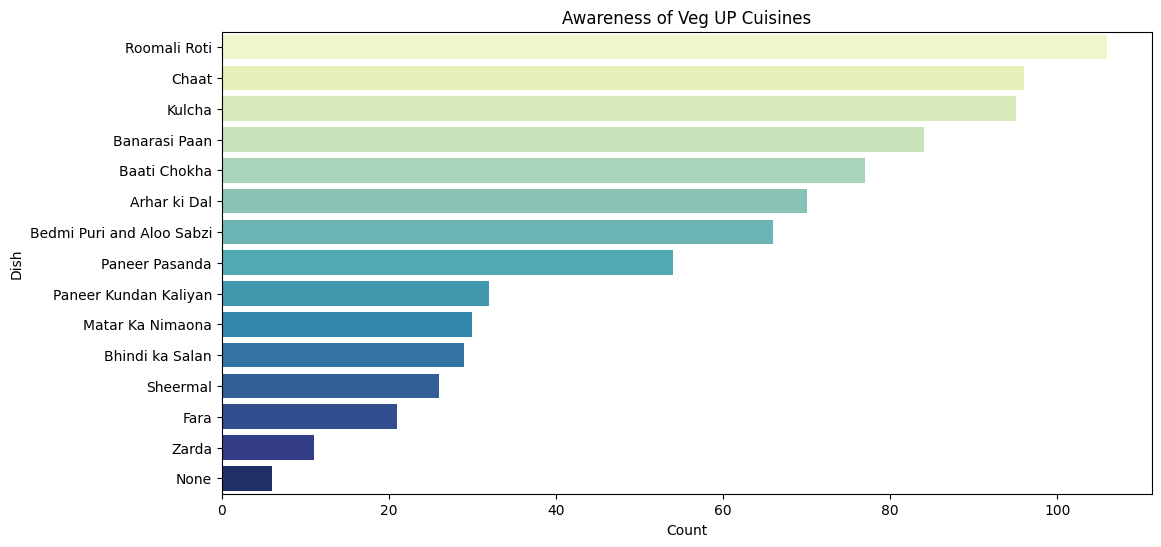

In [ ]:
#7.4 Awareness of Veg UP Cuisines
veg_dishes = {
 'Roomali Roti': 106,
 'Arhar ki Dal': 70,
 'Fara': 21,
 'Matar Ka Nimaona': 30,
 'Bedmi Puri and Aloo Sabzi': 66,
 'Baati Chokha': 77,
 'Bhindi ka Salan': 29,
 'Paneer Kundan Kaliyan': 32,
 'Sheermal': 26,
 'Zarda': 11,
 'Chaat': 96,
 'Banarasi Paan': 84,
 'Kulcha': 95,
 'Paneer Pasanda': 54,
 'None': 6
}
veg_df = pd.DataFrame(list(veg_dishes.items()), columns=['Dish',
'Count'])
plt.figure(figsize=(12,6))
sns.barplot(data=veg_df.sort_values('Count', ascending=False),
x='Count', y='Dish', palette="YlGnBu")
plt.title("Awareness of Veg UP Cuisines")
plt.show()


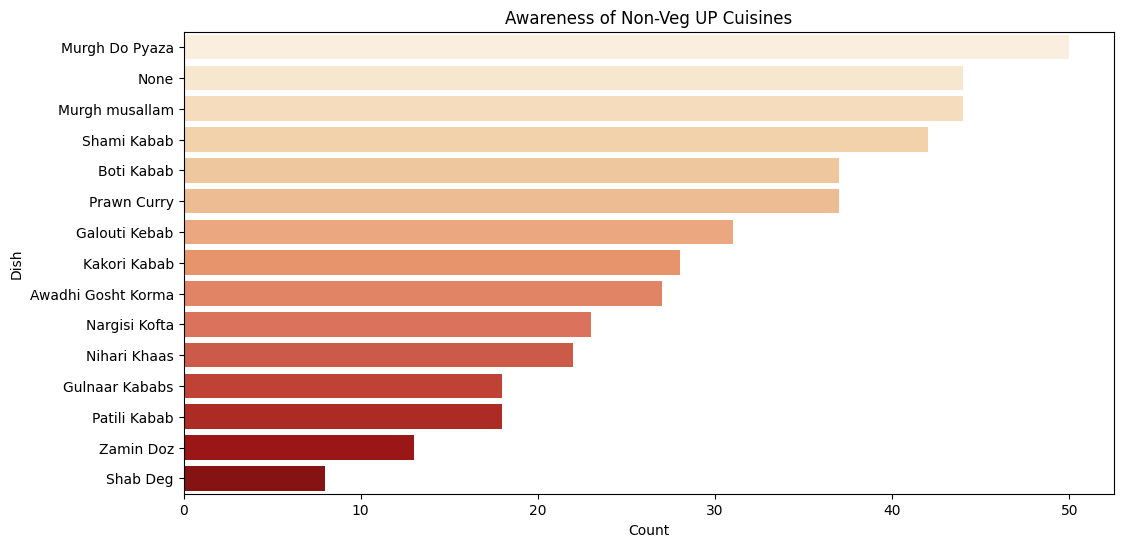

In [ ]:
#7.5 Awareness of Non-Veg UP Cuisines
non_veg_dishes = {
 'Shami Kabab': 42,
 'Kakori Kabab': 28,
 'Awadhi Gosht Korma': 27,
 'Prawn Curry': 37,
 'Murgh Do Pyaza': 50,
 'Galouti Kebab': 31,
 'Gulnaar Kababs': 18,
 'Nihari Khaas': 22,
 'Nargisi Kofta': 23,
 'Patili Kabab': 18,
 'Shab Deg': 8,
 'Zamin Doz': 13,
 'Boti Kabab': 37,
 'Murgh musallam': 44,
 'None': 44
}
nonveg_df = pd.DataFrame(list(non_veg_dishes.items()),
columns=['Dish', 'Count'])
plt.figure(figsize=(12,6))
sns.barplot(data=nonveg_df.sort_values('Count', ascending=False),
x='Count', y='Dish', palette="OrRd")
plt.title("Awareness of Non-Veg UP Cuisines")
plt.show()

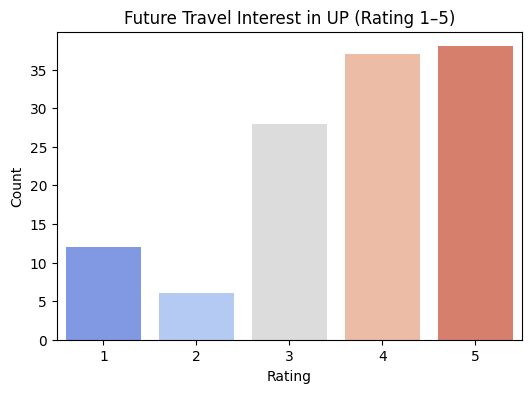

In [ ]:
#7.6 Future Travel Plans to UP (Rating)
ratings = {1: 12, 2: 6, 3: 28, 4: 37, 5: 38}
plt.figure(figsize=(6,4))
sns.barplot(x=list(ratings.keys()), y=list(ratings.values()),
palette="coolwarm")
plt.title("Future Travel Interest in UP (Rating 1–5)")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

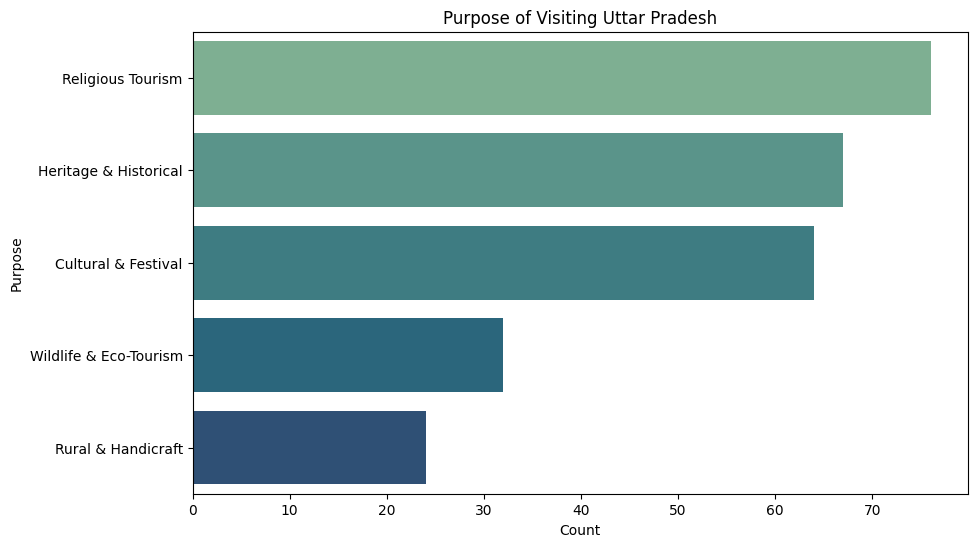

In [ ]:
#7.7 Purpose of Visiting UP
purposes = {
 'Religious Tourism': 76,
 'Heritage & Historical': 67,
 'Wildlife & Eco-Tourism': 32,
 'Cultural & Festival': 64,
 'Rural & Handicraft': 24
}
purpose_df = pd.DataFrame(list(purposes.items()), columns=['Purpose',
'Count'])
plt.figure(figsize=(10,6))
sns.barplot(data=purpose_df.sort_values('Count', ascending=False),
y='Purpose', x='Count', palette="crest")
plt.title("Purpose of Visiting Uttar Pradesh")
plt.show()

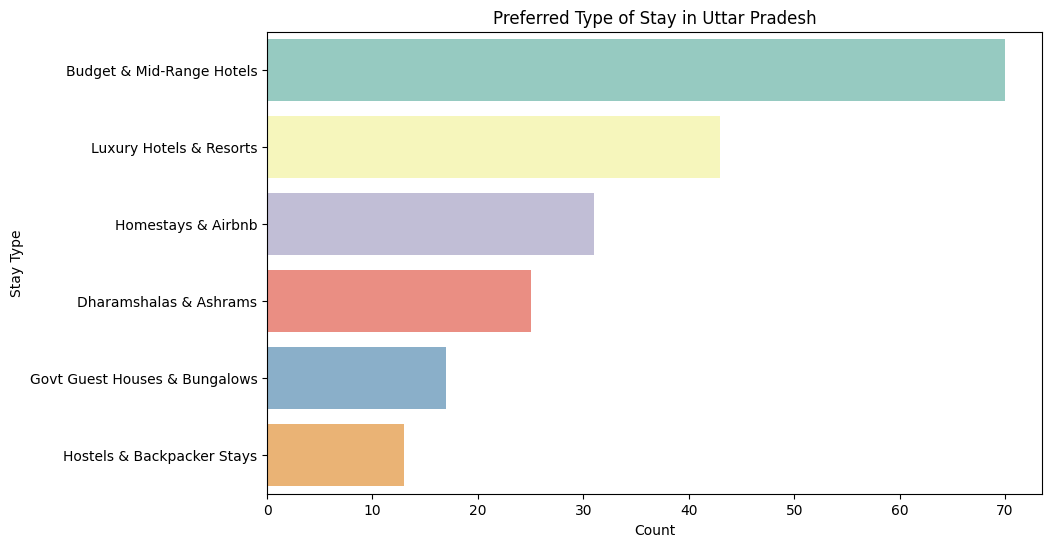

In [ ]:
# 7.8 Preferred Type of Stay
stay = {
 'Luxury Hotels & Resorts': 43,
 'Budget & Mid-Range Hotels': 70,
 'Dharamshalas & Ashrams': 25,
 'Homestays & Airbnb': 31,
 'Govt Guest Houses & Bungalows': 17,
 'Hostels & Backpacker Stays': 13
}
stay_df = pd.DataFrame(list(stay.items()), columns=['Stay Type',
'Count'])
plt.figure(figsize=(10,6))
sns.barplot(data=stay_df.sort_values('Count', ascending=False),
y='Stay Type', x='Count', palette="Set3")
plt.title("Preferred Type of Stay in Uttar Pradesh")
plt.show()

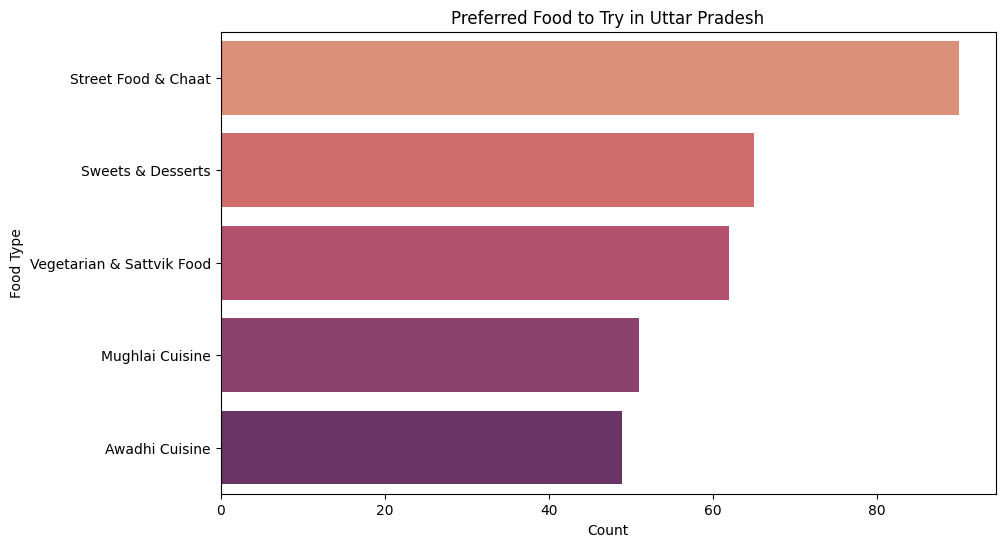

In [ ]:
#7.9 Preferred Food to Try
foods = {
 'Awadhi Cuisine': 49,
 'Mughlai Cuisine': 51,
 'Street Food & Chaat': 90,
 'Vegetarian & Sattvik Food': 62,
 'Sweets & Desserts': 65
}
food_df = pd.DataFrame(list(foods.items()), columns=['Food Type',
'Count'])
plt.figure(figsize=(10,6))
sns.barplot(data=food_df.sort_values('Count', ascending=False),
y='Food Type', x='Count', palette="flare")
plt.title("Preferred Food to Try in Uttar Pradesh")
plt.show()

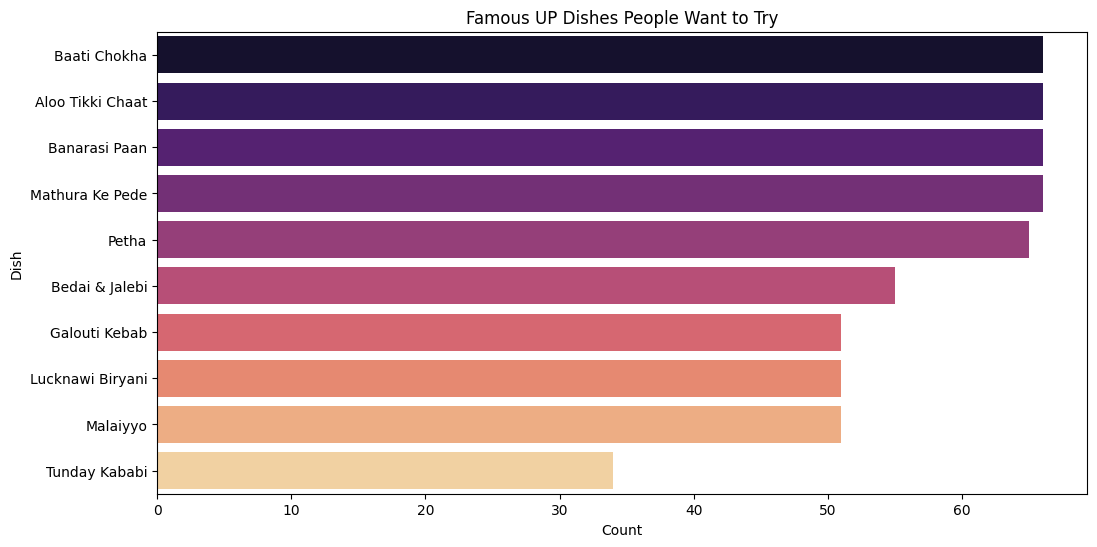

In [ ]:
#7.10 Famous Dishes to Try
famous_dishes = {
 'Tunday Kababi': 34,
 'Lucknawi Biryani': 51,
 'Bedai & Jalebi': 55,
 'Petha': 65,
 'Baati Chokha': 66,
 'Aloo Tikki Chaat': 66,
 'Malaiyyo': 51,
 'Galouti Kebab': 51,
 'Banarasi Paan': 66,
 'Mathura Ke Pede': 66
}
famous_df = pd.DataFrame(list(famous_dishes.items()), columns=['Dish',
'Count'])
plt.figure(figsize=(12,6))
sns.barplot(data=famous_df.sort_values('Count', ascending=False),
y='Dish', x='Count', palette="magma")
plt.title("Famous UP Dishes People Want to Try")
plt.show()

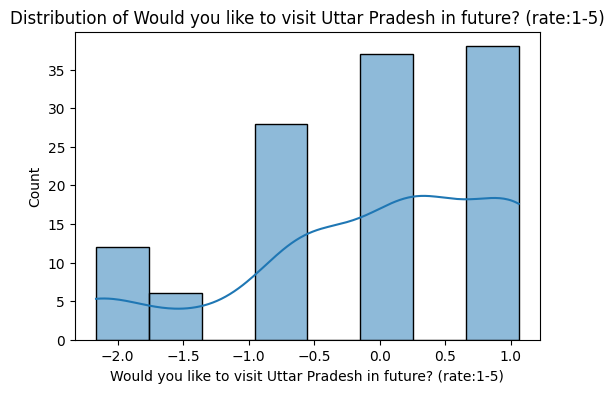

In [ ]:
#7.11 Would You like to visit UP
for col in numeric_cols:
 plt.figure(figsize=(6,4))
 sns.histplot(df[col], kde=True)
 plt.title(f'Distribution of {col}')
 plt.show()

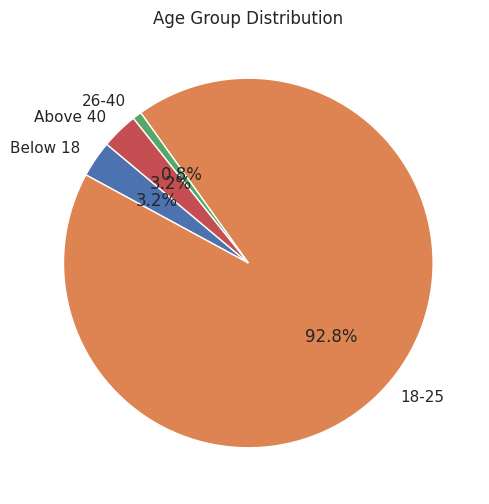

In [ ]:
#7.12 Age Group Distribution
sns.set(style="whitegrid")

# Age Group
age_group = {
    'Below 18': 4,
    '18-25': 116,
    '26-40': 1,
    'Above 40': 4
}

plt.figure(figsize=(6, 6))
plt.pie(age_group.values(), labels=age_group.keys(), autopct='%1.1f%%', startangle=140)
plt.title("Age Group Distribution")
plt.show()

#[8] Model Building :-

**#8.1 Classification Model**

In [ ]:
# 1. Classification Model: Predict if a person has visited Uttar Pradesh
from sklearn.ensemble import RandomForestRegressor

In [ ]:
target_column = 'Would you like to visit Uttar Pradesh in future? (rate:1-5)'

In [ ]:
feature_columns = [
    '  Age Group  ',                        # Column D
    'State of Residence',               # Column E
    'Have you ever visited Uttar Pradesh?',  # Column F
    'What is your dietary preference? ',      # Column G
    "Which of the following Uttar Pradesh's dishes do you know about or have you tried? (Vegetarian)",     # Column H
    "Which of the following Uttar Pradesh's dishes do you know about or have you tried?  (Non-Vegetarian)"  # Column I
]

In [ ]:
print("Target column:", target_column)
print("Feature columns:", feature_columns)

Target column: Would you like to visit Uttar Pradesh in future? (rate:1-5)
Feature columns: ['  Age Group  ', 'State of Residence', 'Have you ever visited Uttar Pradesh?', 'What is your dietary preference? ', "Which of the following Uttar Pradesh's dishes do you know about or have you tried? (Vegetarian)", "Which of the following Uttar Pradesh's dishes do you know about or have you tried?  (Non-Vegetarian)"]


In [ ]:
print("All column names in dataframe:")
print(df.columns.tolist())

All column names in dataframe:
['Timestamp', 'Full Name', '  Age Group  ', 'State of Residence', 'Have you ever visited Uttar Pradesh?', 'What is your dietary preference? ', "Which of the following Uttar Pradesh's dishes do you know about or have you tried? (Vegetarian)", "Which of the following Uttar Pradesh's dishes do you know about or have you tried?  (Non-Vegetarian)", 'Would you like to visit Uttar Pradesh in future? (rate:1-5)', 'For what purpose would you like to visit Uttar Pradesh', 'What kind of stay would to prefer in Uttar Pradesh?', 'What kind of food would you like to try in Uttar Pradesh?', 'Below are the top 10 famous cuisines of Uttar Pradesh, choose that which of the dishes would you try.', 'Cluster', 'Visited_UP']


In [ ]:
#Prepare X and Y
X = df[feature_columns].copy()
y = df[target_column].copy()

In [ ]:
y = y.fillna(y.mean())

In [ ]:
#Encode Features
X_encoded = pd.get_dummies(X, drop_first=True)
print("Features after encoding:", X_encoded.columns.tolist())

Features after encoding: ['  Age Group  ', 'State of Residence', 'Have you ever visited Uttar Pradesh?', 'What is your dietary preference? ', "Which of the following Uttar Pradesh's dishes do you know about or have you tried? (Vegetarian)", "Which of the following Uttar Pradesh's dishes do you know about or have you tried?  (Non-Vegetarian)"]


In [ ]:
#Split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42)

In [ ]:
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (96, 6)
Testing data shape: (25, 6)


In [ ]:
## Train classification model
print("Training Random Forest Regression model...")
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
rf_model.fit(X_train, y_train)

Training Random Forest Regression model...


RandomForestRegressor(random_state=42)

In [ ]:
# Predict and evaluate
y_pred = rf_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Root Mean Squared Error: {np.sqrt(mse):.4f}")

Mean Squared Error: 1.1699
R² Score: -0.6683
Root Mean Squared Error: 1.0816


In [ ]:
#Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance.head(10))


Feature Importance:
                                             Feature  Importance
4  Which of the following Uttar Pradesh's dishes ...    0.371085
1                                 State of Residence    0.240530
5  Which of the following Uttar Pradesh's dishes ...    0.230883
3                  What is your dietary preference?     0.080423
2               Have you ever visited Uttar Pradesh?    0.059118
0                                        Age Group      0.017961


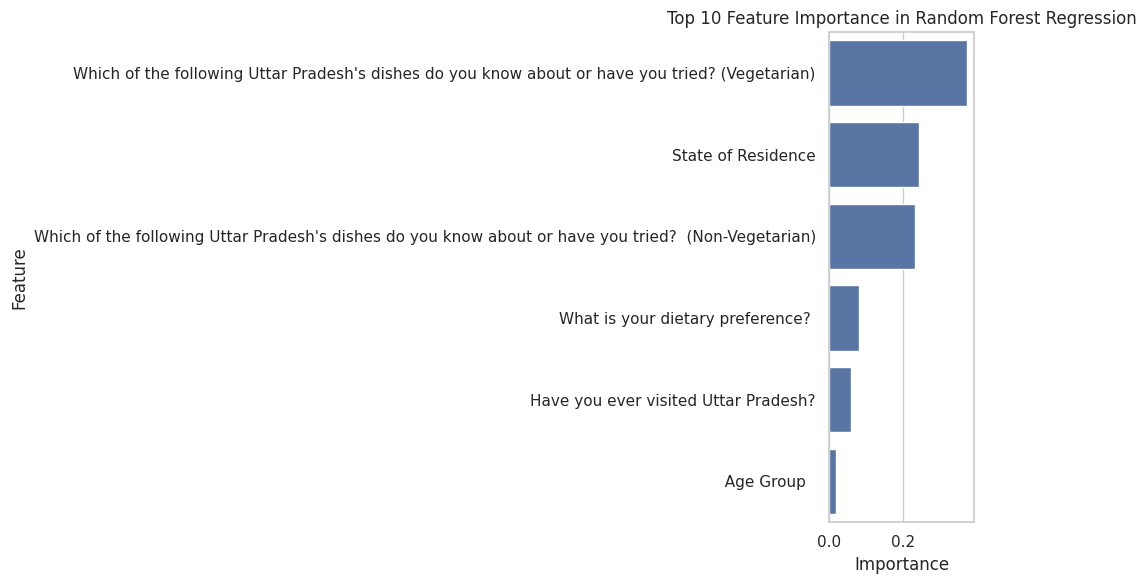

In [ ]:
#Top 10 Feature Importance in Random Forest Regression
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importance in Random Forest Regression')
plt.tight_layout()
plt.show()

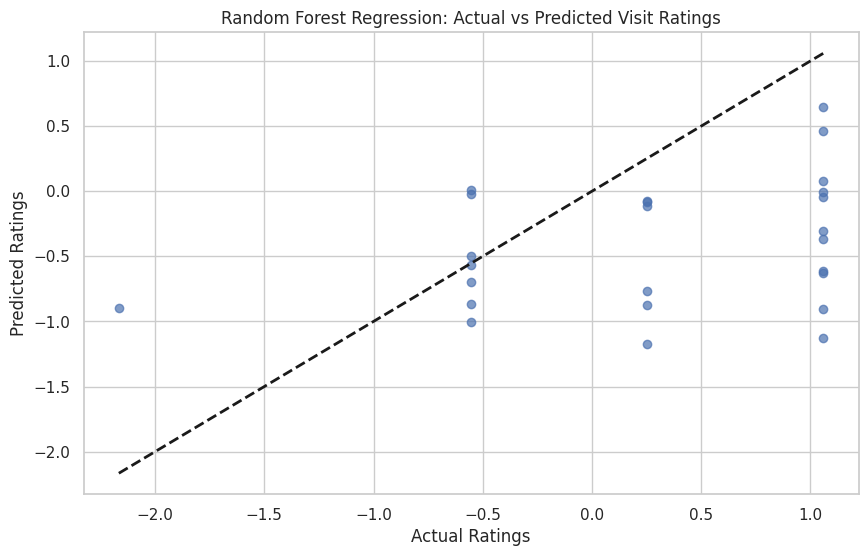

In [ ]:
#Actual vs Predicted Visit Ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Random Forest Regression: Actual vs Predicted Visit Ratings')
plt.grid(True)
plt.show()

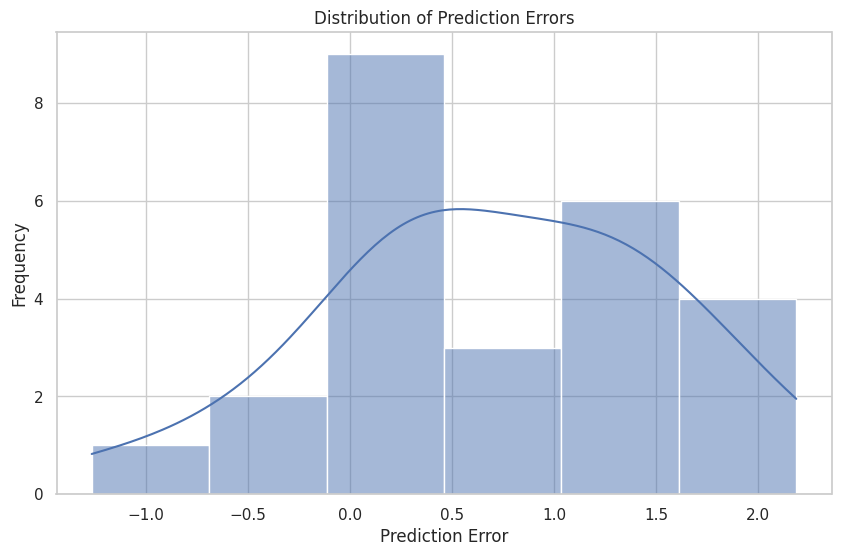

In [ ]:
#Distribution of Prediction Errors
plt.figure(figsize=(10, 6))
errors = y_test - y_pred
sns.histplot(errors, kde=True)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.grid(True)
plt.show()

**#8.2 Regression Model**

In [ ]:
#2. Regression Model: Predict interest in visiting UP (rating 1–5)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Replace missing with average rating
df['Visit_Rating'] = df['Would you like to visit Uttar Pradesh in future? (rate:1-5)'].fillna(3)

In [ ]:
# Replace missing with average rating
df['Visit_Rating'] = df['Would you like to visit Uttar Pradesh in future? (rate:1-5)'].fillna(3)

In [ ]:
# Prepare data
X = df_encoded
y = df['Visit_Rating']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict and evaluate
y_pred = reg.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.8598061839940412


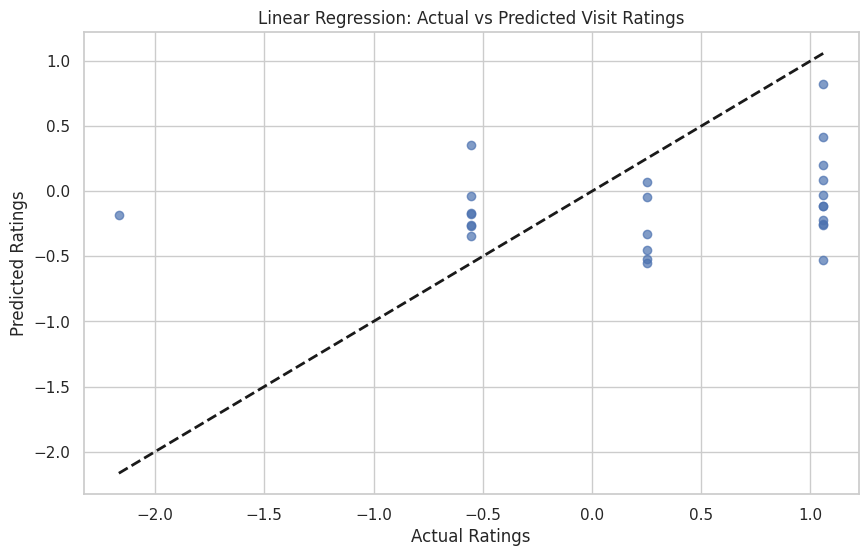

In [ ]:
#Linear Regression: Actual vs Predicted Visit Ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Linear Regression: Actual vs Predicted Visit Ratings')
plt.grid(True)
plt.show()

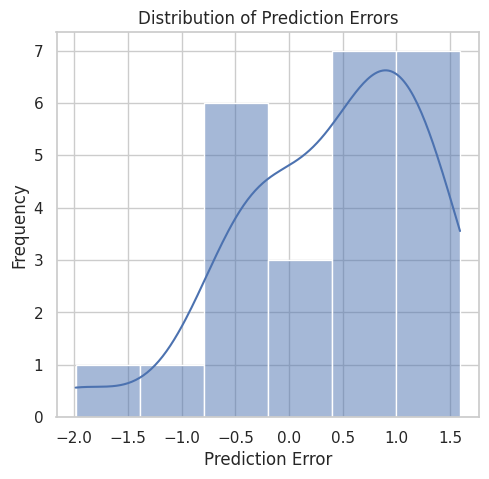

In [ ]:
#Distribution of Prediction Errors
residuals = y_test - y_pred

plt.figure(figsize=(12, 5))
# Residual histogram
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.grid(True)

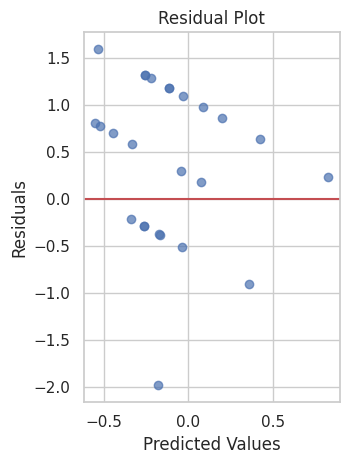

In [ ]:
#Residual Plot
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)

plt.tight_layout()
plt.show()

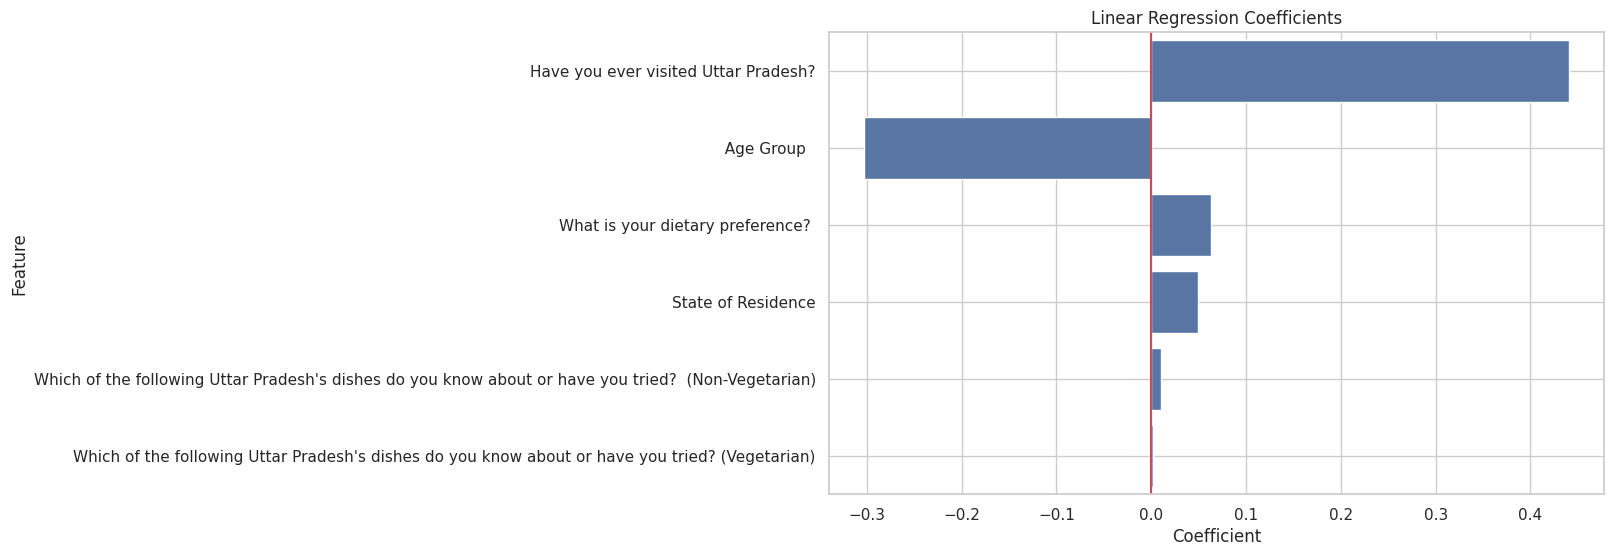


--- Feature Coefficients ---
                                             Feature  Coefficient
2               Have you ever visited Uttar Pradesh?     0.440400
0                                        Age Group      -0.302740
3                  What is your dietary preference?      0.062734
1                                 State of Residence     0.049046
5  Which of the following Uttar Pradesh's dishes ...     0.009827
4  Which of the following Uttar Pradesh's dishes ...     0.002188


In [ ]:
#Linear Regression Coefficients
if hasattr(X, 'columns'):
    coefficients = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': reg.coef_
    })

    # Sort by absolute coefficient value
    coefficients['Abs_Coefficient'] = abs(coefficients['Coefficient'])
    coefficients = coefficients.sort_values('Abs_Coefficient', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Coefficient', y='Feature', data=coefficients)
    plt.title('Linear Regression Coefficients')
    plt.axvline(x=0, color='r', linestyle='-')
    plt.grid(True)
    plt.show()

    print("\n--- Feature Coefficients ---")
    print(coefficients[['Feature', 'Coefficient']])

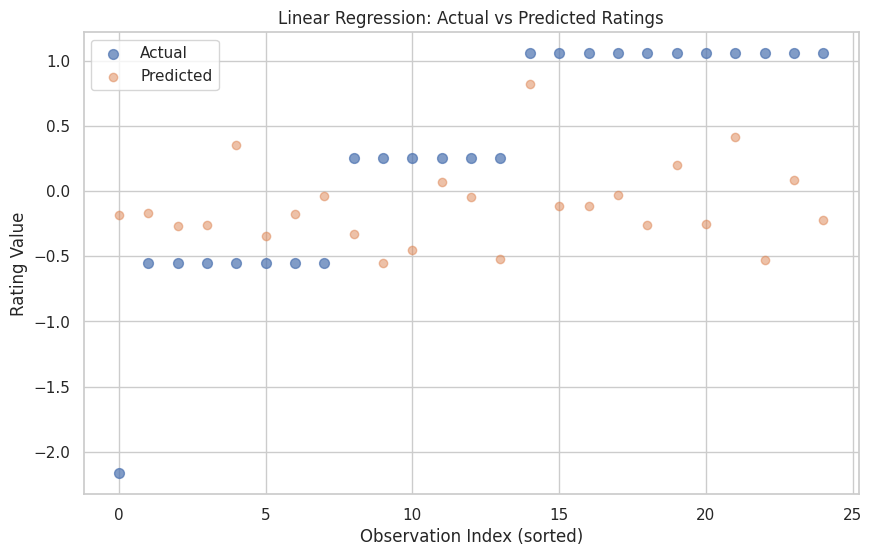

In [ ]:
#Linear Regression: Actual vs Predicted Ratings
plt.figure(figsize=(10, 6))

# Sort by actual values for better visualization
sorted_indices = np.argsort(y_test.values)
sorted_actual = np.array(y_test)[sorted_indices]
sorted_pred = np.array(y_pred)[sorted_indices]

# Create x-axis points
x_points = np.arange(len(sorted_actual))

plt.scatter(x_points, sorted_actual, label='Actual', alpha=0.7, s=50)
plt.scatter(x_points, sorted_pred, label='Predicted', alpha=0.5)

plt.xlabel('Observation Index (sorted)')
plt.ylabel('Rating Value')
plt.title('Linear Regression: Actual vs Predicted Ratings')
plt.legend()
plt.grid(True)
plt.show()